### Python Sesión 2 - Diferencias finitas para problemas a los valores de contorno (PVC)

Parte 4 - Implementación

Se desea conocer el perfil de temperatura en una barra cilíndrica sólida aislada muy delgada de largo $L = 1 m$. Esta barra está sujeta a un gradiente de temperatura en sus extremos. Un extremo de la barra se encuentra a temperatura $T(z=0) = T_0 = 298 K$. El otro extremo de la barra se encuentra a temperatura $T(z=L) = T_1 = 400 K$. 

* a)Encuentre el perfil de temperatura utilizando diferencias finitas en estado estacionario.
* b)Compruebe su resultado con la solución analítica.


### Solución

#### 1. Modelamiento matemático


$$  v_z \frac{\partial T}{\partial z} = k \frac{\partial ^2 T}{\partial z^2} $$

La barra es un sólido que no está en movimiento. Por lo tanto, el término advectivo se cancela y la ecuación diferencial a resolver es:


$$   k \frac{d ^2 T}{d z^2} = 0 $$

Sujeto a las siguientes condiciones de borde:

$$ T(z=0) = 298 K $$

$$ T(z=1) = 400 K $$


#### 2. Discretización utilizando diferencias finitas


Ecuación diferencial discretizada

$$ k \frac{T_{i+1} - 2T_i + T_{i-1}}{\Delta z ^2} = 0 $$

$$ \rightarrow \frac{T_{i+1} - 2T_i + T_{i-1}}{\Delta z ^2} = 0 $$

Válido para $i = 2 .. N $.

Condiciones de borde: 


$T_1 = 298 K$

$T_{N+1} = 400 K$

### 3. Creación de la matriz para solucionar el BVP

$$ \mathbf{A} \vec{T} = \vec{b}$$

In [1]:
# Importar paquetes

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Condiciones de borde del problema

# Temperatura al comienzo de la barra (z=0)
T_0 = 298 # K

# Temperatura al final de la barra (z=1m)
T_N = 400 # K

In [3]:
# Número de nodos en el reticulado

N = 10

# Creamos el dominio
z = np.linspace(0, 1, N+1)
# Espaciamiento de grilla en la dirección z, uniforme
dz = (1-0)/N

# Creamos la matriz A llena de ceros para incorporar el lado izquierdo del sistema de ecuaciones discretizado
A = np.zeros([N+1, N+1])

# Creamos el vector del lado derecho
b = np.zeros(N+1)

print("La matriz A vacía ", A)
print("El vector b vacío ", b )

La matriz A vacía  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
El vector b vacío  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Ecuación diferencial discretizada

$$ \rightarrow \frac{T_{i+1} - 2T_i + T_{i-1}}{\Delta z ^2} = 0 $$

In [4]:
# Asignar ecuación diferencial discretizada a los nodos interiores

for i in range(1,N):
    # Comenzamos desde 1 porque las listas de Python comienzan en 0
    # Terminamos en N porque N+1 es una condición de borde
    A[i][i-1] = 1/dz**2
    A[i][i] = -2/dz**2
    A[i][i+1] = 1/dz**2

# Condiciones de borde
A[0][0] = 1 
A[N][N] = 1

# Asignamos las condiciones de borde al primer y último elemento del lado derecho
b[0] = T_0
b[N] = T_N

# Imprimimos la matriz para comprobar su estructura tridiagonal
print(A)

[[   1.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [ 100. -200.  100.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.  100. -200.  100.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.  100. -200.  100.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.  100. -200.  100.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.  100. -200.  100.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.  100. -200.  100.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.  100. -200.  100.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.  100. -200.  100.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.  100. -200.  100.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.]]


Utilizamos `NumPy.linalg.solve` para resolver el sistema de ecuaciones lineales.

In [6]:
# Utilizamos linalg.solve para re
T_num = np.linalg.solve(A,b)
print(T_num)

[298.  308.2 318.4 328.6 338.8 349.  359.2 369.4 379.6 389.8 400. ]


La solución analítica de la ecuación diferencial es

$$ T(z) = T_0 + (T_N - T_0)z $$

### Graficar

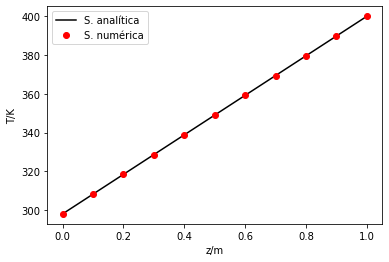

In [11]:
# Solución analítica
T_an = T_0 + (T_N-T_0) * z
plt.plot(z, T_an, 'k', label='S. analítica')

# Solución numérica
plt.plot(z, T_num,'ro', label='S. numérica')

plt.xlabel('z/m')
plt.ylabel('T/K')

plt.legend()
plt.show()
